## **Data Analysis Python Project - Blinkit Analysis**

### **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [3]:
df = pd.read_csv("blinkit_data.csv")

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Size of Data**

In [6]:
print("Size of Data:", df.shape) #For no. of rows & columns

Size of Data: (8523, 12)


### **Field Info**

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 
                                                         'low fat': 'Low Fat', 
                                                         'reg': 'Regular'})

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **Business Requirement**

### **KPI's Requirements**

In [12]:
#Total Sales:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.0f}")

#Average Sales:
average_sales = df['Sales'].mean()
print(f"Average Sales: ${average_sales:,.0f}")

#No.of Items:
number_of_items = df['Item Identifier'].nunique()
print(f"Number of Different Items Sold: ${number_of_items:,.0f}")

#Average Rating:
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:,.1f}")

Total Sales: $1,201,681
Average Sales: $141
Number of Different Items Sold: $1,559
Average Rating: 4.0


### **Chart’s Requirements**

In [13]:
#1. Total Sales by Fat Content: 
#Objective: Analyze the impact of fat content on total sales.

fat_kpi = df.groupby('Item Fat Content').agg({
    'Sales': ['sum', 'mean'],
    'Item Identifier': 'nunique',
    'Rating': 'mean'
}).reset_index()

# Renaming columns for more clarity
fat_kpi.columns = ['Fat Content', 'Total Sales', 'Average Sales', 'Number of Items', 'Average Rating']
print(fat_kpi)

  Fat Content  Total Sales  Average Sales  Number of Items  Average Rating
0     Low Fat  776319.6784     140.714098             1008        3.966286
1     Regular  425361.8024     141.504259              551        3.965070


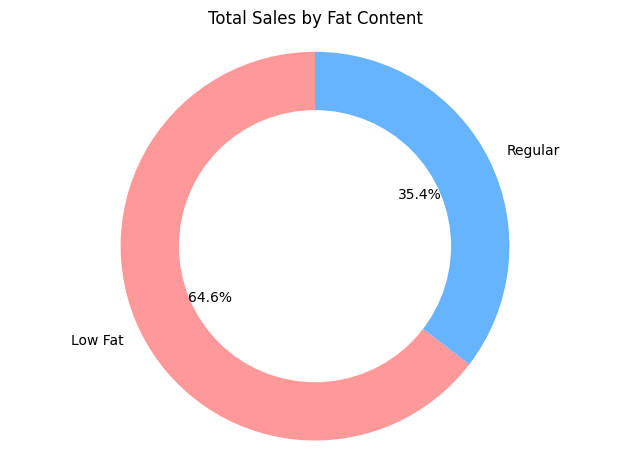

In [14]:
#Visualisation of the Chart:

# Data for the chart
labels = fat_kpi['Fat Content']
sizes = fat_kpi['Total Sales']

# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Creating a donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width':0.4}
)

# Adding center circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Chart title
ax.set_title('Total Sales by Fat Content')

# Displaying the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig("total_sales_by_fat_content.png", dpi=300, bbox_inches='tight') #Saving the Figure
plt.show() #Showing the plot

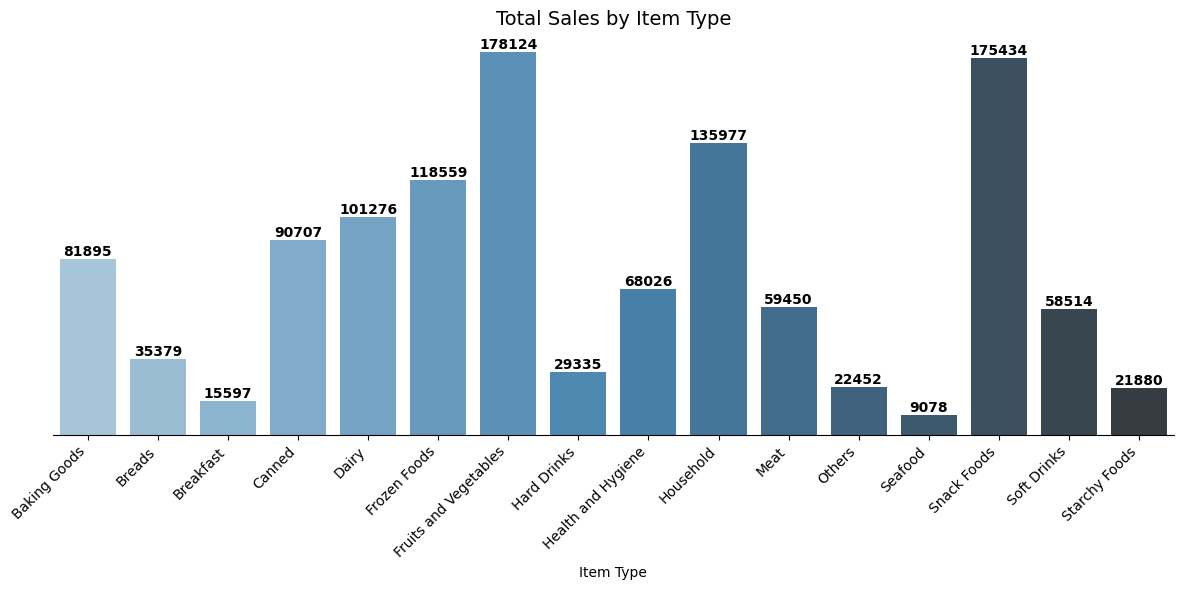

In [15]:
#2. Total Sales by Item Type:
#Objective: Identify the performance of different item types in terms of total sales.

itemtype_kpi = df.groupby('Item Type').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Number_of_Items=('Item Identifier', 'nunique'),
    Average_Rating=('Rating', 'mean')
).reset_index()

#Visualisation of the Bar Chart:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=itemtype_kpi,
    x='Item Type',
    y='Total_Sales',
    hue='Item Type',
    palette='Blues_d',
    legend=False
)

# Adding data labels on top of each bar
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),  # No decimals
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Plotting the bar chart
plt.title("Total Sales by Item Type", fontsize=14)
plt.xlabel("Item Type")
plt.ylabel("")  # Remove y-axis label
plt.xticks(rotation=45, ha='right')
plt.yticks([])  # Remove y-axis values
barplot.spines['left'].set_visible(False)  # Remove left border
barplot.spines['right'].set_visible(False)
barplot.spines['top'].set_visible(False)
barplot.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("total_sales_by_item_type.png", dpi=300, bbox_inches='tight') #Saving the Figure
plt.show() #Showing the plot

In [53]:
#3. Fat Content by Outlet for Total Sales:
#Objective: Compare total sales across different outlets segmented by fat content.

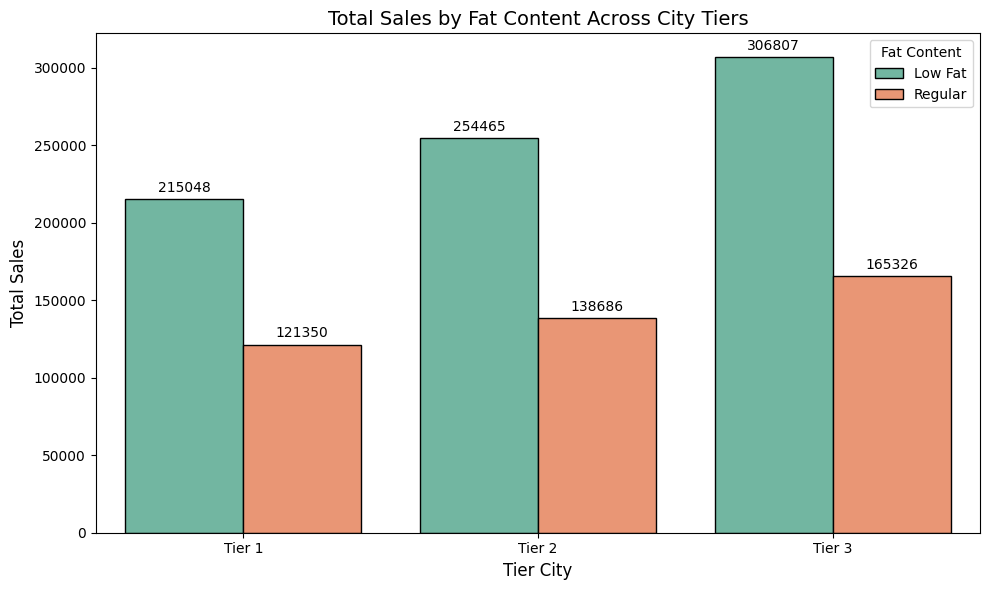

In [19]:
# Grouping the data by Tier and Fat Content
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content']).agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Number_of_Items=('Item Identifier', 'nunique'),
    Average_Rating=('Rating', 'mean')
).reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='Outlet Location Type',
    y='Total_Sales',
    hue='Item Fat Content',
    palette='Set2',
    edgecolor='black'
)

# Customising the chart
plt.title("Total Sales by Fat Content Across City Tiers", fontsize=14)
plt.xlabel("Tier City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title='Fat Content')
plt.grid(False)  # Remove gridlines
plt.tight_layout()

# Showing values on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

plt.savefig("grouped_fat_sales_by_city_tier.png", dpi=300, bbox_inches='tight') #Saving the Chart
plt.show() #Showing the plot

In [20]:
#4. Total Sales by Outlet Establishment:
#Objective: Evaluate how the age or type of outlet establishment influences total sales.

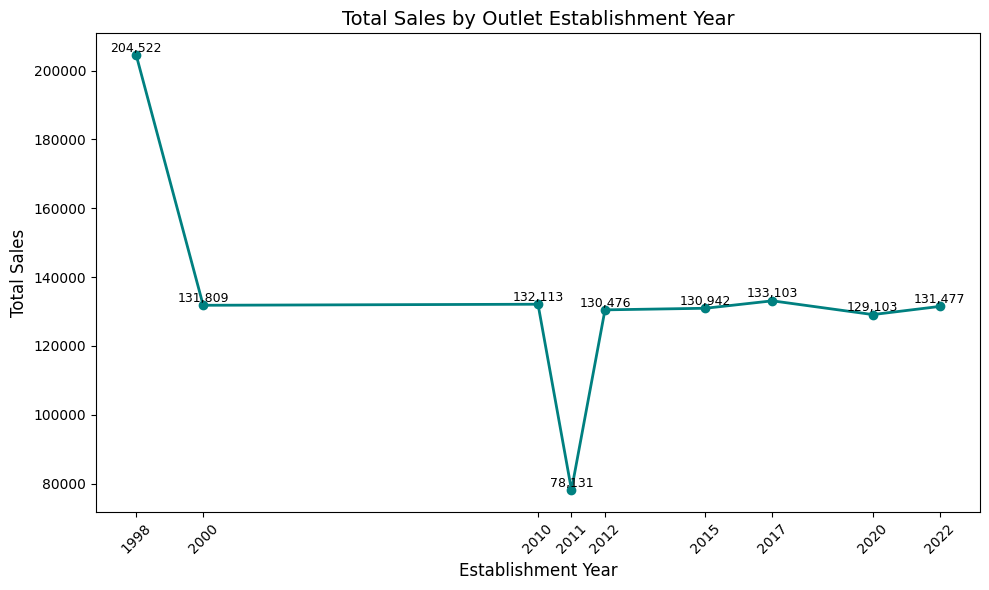

In [22]:
# Grouping by establishment year and calculate total sales
establishment_sales = df.groupby('Outlet Establishment Year').agg(
    Total_Sales=('Sales', 'sum')
).reset_index().sort_values('Outlet Establishment Year')

# Plotting Line Chart
plt.figure(figsize=(10, 6))
plt.plot(
    establishment_sales['Outlet Establishment Year'],
    establishment_sales['Total_Sales'],
    marker='o',
    linestyle='-',
    color='teal',
    linewidth=2
)

# Customizing the chart
plt.title("Total Sales by Outlet Establishment Year", fontsize=14)
plt.xlabel("Establishment Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(establishment_sales['Outlet Establishment Year'], rotation=45)
plt.grid(False)

# Adding data labels to each point
for x, y in zip(establishment_sales['Outlet Establishment Year'], establishment_sales['Total_Sales']):
    plt.text(x, y + 100, f'{int(y):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("total_sales_by_establishment_year.png", dpi=300, bbox_inches='tight') #Saving the figure
plt.show() #Showing the plot

In [ ]:
#5. Sales by Outlet Size:
#Objective: Analyze the correlation between outlet size and total sales.

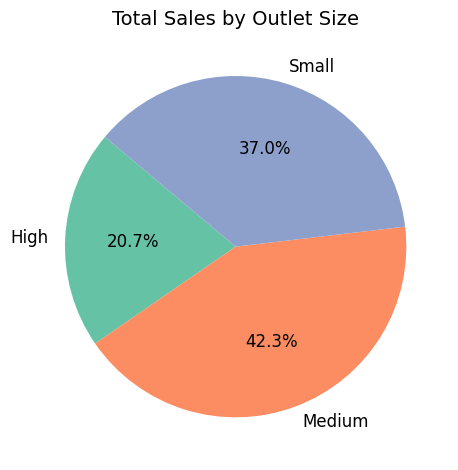

In [28]:
# Grouping by Outlet Size
outlet_size_sales = df.groupby('Outlet Size').agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Removing missing or NaN outlet sizes (if any)
outlet_size_sales = outlet_size_sales.dropna()

# Plotting pie chart
wedges, texts, autotexts = plt.pie(
    outlet_size_sales['Total_Sales'],
    labels=outlet_size_sales['Outlet Size'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
# Adding title and style
plt.title('Total Sales by Outlet Size', fontsize=14)
plt.tight_layout()
plt.savefig("sales_by_outlet_size_donut.png", dpi=300, bbox_inches='tight') #Saving the figure
plt.show() #Showing the plot

In [29]:
#6. Sales by Outlet Location:
#Objective: Assess the geographic distribution of sales across different locations.

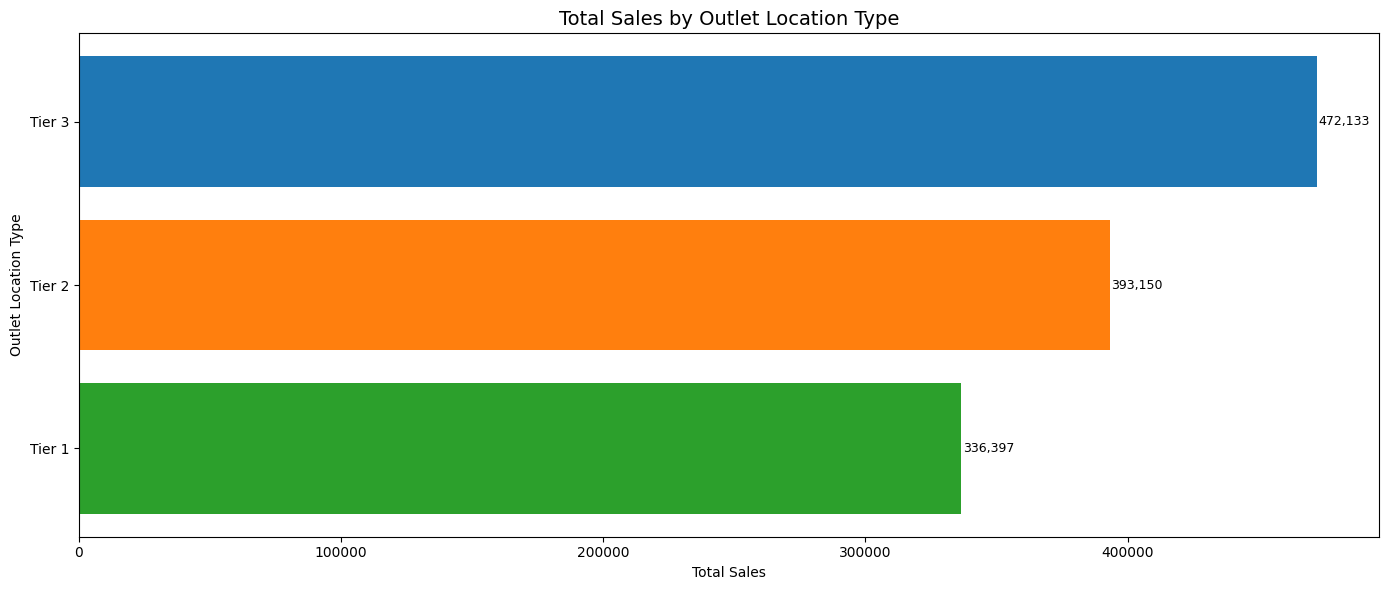

In [39]:
# Grouping sales by Outlet Location Type
location_sales = df.groupby('Outlet Location Type').agg(
    Total_Sales=('Sales', 'sum')
).reset_index().sort_values('Total_Sales', ascending=False)

# Plotting funnel-style bar chart
plt.figure(figsize=(14, 6))
bars = plt.barh(
    location_sales['Outlet Location Type'],
    location_sales['Total_Sales'],
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

# Adding data labels
for bar in bars:
    plt.text(
        bar.get_width() + 700,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width()):,}',
        va='center',
        fontsize=9
    )

# Styling & Plotting
plt.gca().invert_yaxis()  # To resemble funnel shape (top-heavy)
plt.title('Total Sales by Outlet Location Type', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type') 
plt.grid(False)
plt.tight_layout()
plt.savefig("sales_by_location_funnel.png", dpi=300, bbox_inches='tight') #Saving the figure
plt.show() #Showing the plot